<b>The Client</b>

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

<br/>

<b>Project delivery:</b>

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights.

<br/>

<b>Data Set:</b>

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

<b>Cab_Data.csv</b> – this file includes details of transaction for 2 cab companies

<b>Customer_ID.csv</b> – this is a mapping table that contains a unique identifier which links the customer’s demographic details

<b>Transaction_ID.csv</b> – this is a mapping table that contains transaction to customer mapping and payment mode

<b>City.csv</b> – this file contains list of US cities, their population and number of cab users

<br/>

<b>You should fully investigate and understand each data set.</b>

• Review the Source Documentation √

• Understand the field names and data types √

• Identify relationships across the files √

• Field/feature transformations

• Determine which files should be joined versus which ones should be appended √

• Create master data and explain the relationship √

• Identify and remove duplicates √

• Perform other analysis like NA value and outlier detection 

In [1]:
#Imports 
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

In [2]:
#collect data 

cab = pd.read_csv("./Data/Cab_Data.csv")
customer = pd.read_csv("./Data/Customer_ID.csv")
transaction = pd.read_csv("./Data/Transaction_ID.csv")
city = pd.read_csv("./Data/City.csv")

### First 5 Rows

In [3]:
#top 5 
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab["Transaction ID"].unique()

array([10000011, 10000012, 10000013, ..., 10440105, 10440106, 10440107])

The cab dataset (Cab_Data.csv) has a column for transaction ID, date of travel, company, city, KM Traveled, price charged, and cost of trip.

In [5]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
customer["Customer ID"].unique()

array([29290, 27703, 28712, ..., 41414, 41677, 39761])

The customer dataset (Customer_ID.csv) has columns for customer ID, gender, age, and monthly income in USD of the customer.

In [7]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
transaction.Payment_Mode.unique()

array(['Card', 'Cash'], dtype=object)

In [9]:
transaction["Transaction ID"].unique()

array([10000011, 10000012, 10000013, ..., 10440106, 10440107, 10440108])

In [10]:
transaction["Customer ID"].unique()

array([29290, 27703, 28712, ..., 41414, 41677, 39761])

The transaction dataset (Transaction_ID.csv) has a column for the transaction ID, customer ID, and payment mode -whether the customer paid in cash or card. 

The cab datset and the transaction dataset can be joined based on the column Transaction ID.

The customer and transaction dataset can be joined based on the customer id column.

None of the datasets should be appended.

In [11]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [12]:
city[city.City=="SILICON VALLEY"]

,City,Population,Users
4,SILICON VALLEY,"1,177,609","27,247"


The city dataset (City.csv) has the city name and state. I already can see that there's a city with just the city, and might need to be removed later. It also has the overall population of that city and the users in the city. 

### Data Summary

In [13]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [14]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [16]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


### Check for Duplicates 

In [17]:
cab.duplicated().sum()

0

In [18]:
customer.duplicated().sum()

0

In [19]:
transaction.duplicated().sum()

0

In [20]:
city.duplicated().sum()

0

None of the datasets have duplicates.

### Check for Null Values

In [21]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [22]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [23]:
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [24]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

There are no null values in the datasets.

## Create master data and explain the relationship

The cab datset and the transaction dataset can be joined based on the column Transaction ID.

The customer and transaction dataset can be joined based on the customer id column.

<b>View cab, transaction, and customer dataframes.</b> 

In [25]:
cab.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [26]:
transaction.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


In [27]:
customer.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


<b>Merge cab and transaction datset</b>

In [28]:
# merge cab and transaction dataset
df1 = pd.merge(cab, transaction)
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


<b>Merge df1 and customer dataset</b>

In [29]:
# now merge df1 and customer datset
newdf = pd.merge(df1, customer)
newdf.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


<b>Check for null and duplicate values again</b>

In [30]:
newdf.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [31]:
newdf.duplicated().sum()

0

In [32]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 35.6+ MB


There are 0 duplicate and null values. The new datset has <b>12</b> columns and <b>359,392</b> rows of entries.

## <b>Check for outliers</b>

<AxesSubplot:xlabel='KM Travelled'>

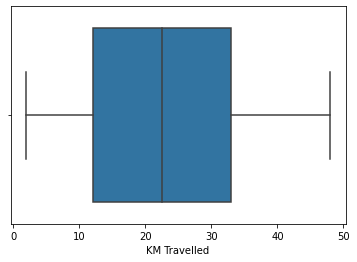

In [33]:
sns.boxplot(x = newdf["KM Travelled"])

<AxesSubplot:xlabel='Cost of Trip'>

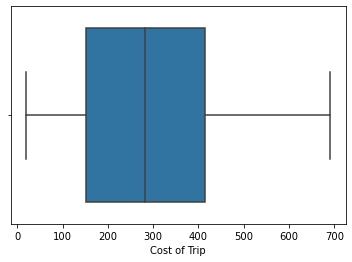

In [34]:
sns.boxplot(x=newdf["Cost of Trip"])

<AxesSubplot:xlabel='Age'>

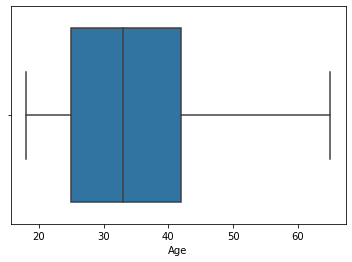

In [35]:
sns.boxplot(x=newdf["Age"])

<AxesSubplot:xlabel='Income (USD/Month)'>

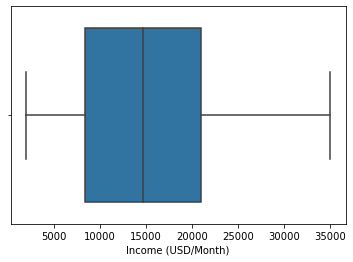

In [36]:
sns.boxplot(x=newdf["Income (USD/Month)"])

<AxesSubplot:xlabel='Price Charged'>

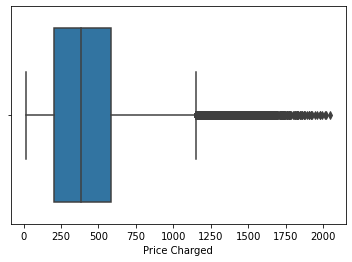

In [37]:
sns.boxplot(x=newdf["Price Charged"])

The only column that has outliers is the "Price Charged" column. I want to see if there's a correlation between price charged and income.

In [38]:
newdf["Price Charged"].describe()

count    359392.000000
mean        423.443311
std         274.378911
min          15.600000
25%         206.437500
50%         386.360000
75%         583.660000
max        2048.030000
Name: Price Charged, dtype: float64

In [39]:
#get rows that have a price charged greater than 1,100
#outliers = newdf[newdf["Price Charged"] > 1100]
#outliers.head(3)

<b>Filter the rows that have a price charged less than $1,100</b>

In [40]:
newdf = newdf[newdf["Price Charged"] < 1100]
newdf.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [41]:
#check the new describe stats
newdf["Price Charged"].describe()

count    351411.000000
mean        404.676999
std         246.434923
min          15.600000
25%         202.660000
50%         378.320000
75%         568.100000
max        1099.980000
Name: Price Charged, dtype: float64

<AxesSubplot:xlabel='Price Charged'>

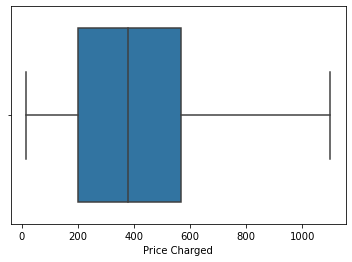

In [42]:
sns.boxplot(x=newdf["Price Charged"])

## Deal with Date of Travel column.

## Field/feature transformations

# Hypothesis 

1. Is there a correlation between "Price Charged" and "Income (USD/Month)"?
2. Which city will have the most customers by rate and raw numbers?
3. Is there a seasonal trend for the date of travel?
4. I think there will be a correlation between "KM Travelled" and "Price Charged".
5. Will customers with a higher "Income (USD/Month)" have a higher "Cost of Trip"?
6. Do customers prefer to pay with a card vs cash?
7. What is the ratio of Male to Female customers.